In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the existing nutrition_dataset.csv file
df = pd.read_csv('/content/nutrition_dataset.csv')
df.head()

,Age,Gender,Height,Weight,Activity Level,Fitness Goal,Dietary Preference,Daily Calorie Target,Protein,Carbohydrates,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion
0,25,Male,180,80,Moderately Active,Weight Loss,Omnivore,2000,120,250,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit
1,32,Female,165,65,Lightly Active,Weight Loss,Vegetarian,1600,80,200,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter
2,48,Male,175,95,Sedentary,Maintenance,Vegan,2200,100,300,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix
3,55,Female,160,70,Very Active,Weight Loss,Omnivore,2500,140,350,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter
4,62,Male,170,85,Sedentary,Maintenance,Vegetarian,2000,80,250,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   498 non-null    int64 
 1   Gender                498 non-null    object
 2   Height                498 non-null    int64 
 3   Weight                498 non-null    int64 
 4   Activity Level        498 non-null    object
 5   Fitness Goal          498 non-null    object
 6   Dietary Preference    498 non-null    object
 7   Daily Calorie Target  498 non-null    int64 
 8   Protein               498 non-null    int64 
 9   Carbohydrates         498 non-null    int64 
 10  Fat                   498 non-null    int64 
 11  Breakfast Suggestion  498 non-null    object
 12  Lunch Suggestion      498 non-null    object
 13  Dinner Suggestion     498 non-null    object
 14  Snack Suggestion      498 non-null    object
dtypes: int64(7), object(8)
memory usage: 58.

In [3]:
df.shape

(498, 15)

In [4]:
df.describe()

,Age,Height,Weight,Daily Calorie Target,Protein,Carbohydrates,Fat
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,41.210843,172.636546,76.287149,2124.497992,110.030120,245.271084,61.345382
std,15.151207,9.686973,14.692416,482.075335,36.953245,65.545819,16.179240
min,19.000000,155.000000,48.000000,1200.000000,50.000000,120.000000,30.000000
25%,28.000000,165.000000,65.000000,1800.000000,80.000000,200.000000,50.000000
50%,38.000000,170.000000,75.000000,2000.000000,100.000000,227.500000,60.000000
75%,55.000000,180.000000,90.000000,2400.000000,137.500000,300.000000,70.000000
max,72.000000,190.000000,110.000000,3500.000000,220.000000,400.000000,120.000000


In [5]:
df.size


7470

In [6]:
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
Age                     0
Gender                  0
Height                  0
Weight                  0
Activity Level          0
Fitness Goal            0
Dietary Preference      0
Daily Calorie Target    0
Protein                 0
Carbohydrates           0
Fat                     0
Breakfast Suggestion    0
Lunch Suggestion        0
Dinner Suggestion       0
Snack Suggestion        0
dtype: int64


In [7]:
print("\nChecking for duplicate values:")
print(df.duplicated().sum())


Checking for duplicate values:
0


In [8]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows (if any)
if not duplicate_rows.empty:
  print("Duplicate rows found:")
  print(duplicate_rows)
else:
  print("No duplicate rows found.")

No duplicate rows found.


In [9]:
# Add a 'sugar' column (example: sugar content based on carbohydrates)
df['Sugar'] = df['Carbohydrates'] * 0.5  # Replace with your actual calculation

# Add a 'sodium' column (example: sodium content based on protein)
df['Sodium'] = df['Protein'] * 0.2  # Replace with your actual calculation

# Add a 'calories' column (example: calories based on fat, protein, and carbs)
# Removed the extra space from 'Protein ' to 'Protein'
df['Calories'] = df['Fat'] * 9 + df['Protein'] * 4 + df['Carbohydrates'] * 4

# Calculate fiber as 12% of the carbohydrate content and add it as a new column
df['Fiber'] = df['Carbohydrates'] * 0.12

# Display the updated DataFrame
print(df.head())

   Age  Gender  Height  Weight     Activity Level Fitness Goal  \
0   25    Male     180      80  Moderately Active  Weight Loss   
1   32  Female     165      65     Lightly Active  Weight Loss   
2   48    Male     175      95          Sedentary  Maintenance   
3   55  Female     160      70        Very Active  Weight Loss   
4   62    Male     170      85          Sedentary  Maintenance   

  Dietary Preference  Daily Calorie Target  Protein  Carbohydrates  Fat  \
0           Omnivore                  2000      120            250   60   
1         Vegetarian                  1600       80            200   40   
2              Vegan                  2200      100            300   65   
3           Omnivore                  2500      140            350   80   
4         Vegetarian                  2000       80            250   55   

                                Breakfast Suggestion  \
0                      Oatmeal with berries and nuts   
1                         Tofu scramble 

In [10]:
# Save the updated DataFrame to the same CSV file
df.to_csv('/content/nutrition_dataset.csv', index=False)  # Set index=False to avoid saving the index column

# You can add more columns and calculations as needed.

# Display the updated DataFrame
print(df.head())

   Age  Gender  Height  Weight     Activity Level Fitness Goal  \
0   25    Male     180      80  Moderately Active  Weight Loss   
1   32  Female     165      65     Lightly Active  Weight Loss   
2   48    Male     175      95          Sedentary  Maintenance   
3   55  Female     160      70        Very Active  Weight Loss   
4   62    Male     170      85          Sedentary  Maintenance   

  Dietary Preference  Daily Calorie Target  Protein  Carbohydrates  Fat  \
0           Omnivore                  2000      120            250   60   
1         Vegetarian                  1600       80            200   40   
2              Vegan                  2200      100            300   65   
3           Omnivore                  2500      140            350   80   
4         Vegetarian                  2000       80            250   55   

                                Breakfast Suggestion  \
0                      Oatmeal with berries and nuts   
1                         Tofu scramble 

In [11]:
# Define a function to assign diseases based on nutrient criteria
def assign_disease(row):
    diseases = []
    # Criteria for Diabetes
    if row['Carbohydrates'] < 150 and row['Sugar'] < 100 and row['Protein'] >= 50:
        diseases.append('Diabetes')
    # Criteria for Acne
    if row['Sugar'] < 100 and row['Fat'] < 50 and row['Carbohydrates'] < 150:
        diseases.append('Acne')
    # Criteria for Weight Loss
    if row['Calories'] < 1000 and row['Protein'] > 50 and row['Carbohydrates'] < 150:
        diseases.append('Weight Loss')
    # Criteria for Weight Gain
    if row['Calories'] > 400 and row['Protein'] > 50 and row['Carbohydrates'] > 120 and row['Fat'] > 30:
        diseases.append('Weight Gain')
    # Criteria for Hypertension
    if row['Sodium'] < 50  and row['Fat'] < 50:
        diseases.append('Hypertension')
    # Criteria for Heart Disease
    if row['Fat'] < 50 and row['Protein'] > 50:
        diseases.append('Heart Disease')
    # Criteria for Kidney Disease
    if row['Protein'] < 80 and row['Sodium'] < 50:
        diseases.append('Kidney Disease')
    # Criteria for Cholesterol
    if row['Fat'] < 5 and row['Fiber'] > 10:
        diseases.append('Cholesterol')

    # Return the diseases as a comma-separated string
    return ', '.join(diseases) if diseases else 'Normal'

# Apply the function to create the Disease column
df['Disease'] = df.apply(assign_disease, axis=1)

# Save the updated dataset
df.to_csv('/content/nutrition_dataset.csv', index=False)

# Display first few rows to check
df.head()


,Age,Gender,Height,Weight,Activity Level,Fitness Goal,Dietary Preference,Daily Calorie Target,Protein,Carbohydrates,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Sugar,Sodium,Calories,Fiber,Disease
0,25,Male,180,80,Moderately Active,Weight Loss,Omnivore,2000,120,250,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,125.0,24.0,2020,30.0,Weight Gain
1,32,Female,165,65,Lightly Active,Weight Loss,Vegetarian,1600,80,200,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,100.0,16.0,1480,24.0,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Maintenance,Vegan,2200,100,300,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,150.0,20.0,2185,36.0,Weight Gain
3,55,Female,160,70,Very Active,Weight Loss,Omnivore,2500,140,350,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,175.0,28.0,2680,42.0,Weight Gain
4,62,Male,170,85,Sedentary,Maintenance,Vegetarian,2000,80,250,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix,125.0,16.0,1815,30.0,Weight Gain


In [12]:
# Remove duplicates if any
nutrition_data = df.drop_duplicates()

In [13]:
# check min and max value for sugar,protien,carbohydrates,sodium,fat,calories exact value

import pandas as pd

# Load the DataFrame
df = pd.read_csv('/content/nutrition_dataset.csv')

# Calculate min and max for specific columns
for column in ['Sugar', 'Protein', 'Carbohydrates', 'Sodium', 'Fat', 'Calories', 'Fiber']:
  min_val = df[column].min()
  max_val = df[column].max()
  print(f"Column: {column}")
  print(f"Min: {min_val}")
  print(f"Max: {max_val}")
  print("-" * 20)

Column: Sugar
Min: 60.0
Max: 200.0
--------------------
Column: Protein
Min: 50
Max: 220
--------------------
Column: Carbohydrates
Min: 120
Max: 400
--------------------
Column: Sodium
Min: 10.0
Max: 44.0
--------------------
Column: Fat
Min: 30
Max: 120
--------------------
Column: Calories
Min: 990
Max: 3390
--------------------
Column: Fiber
Min: 14.4
Max: 48.0
--------------------


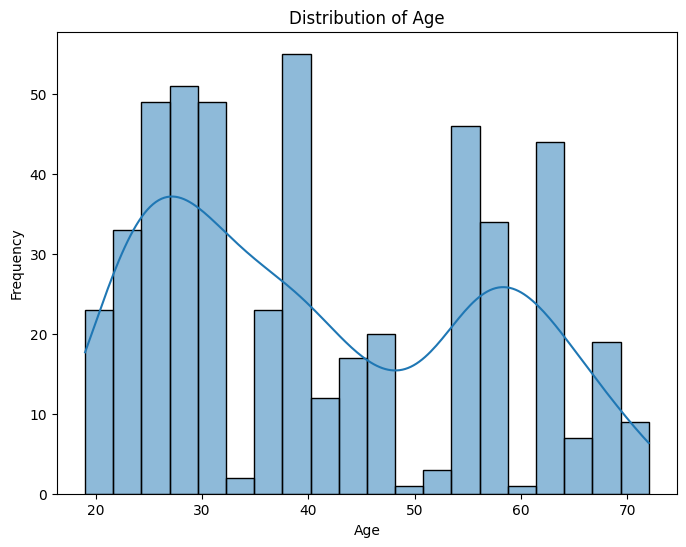

In [14]:
# Visualize the distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(nutrition_data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

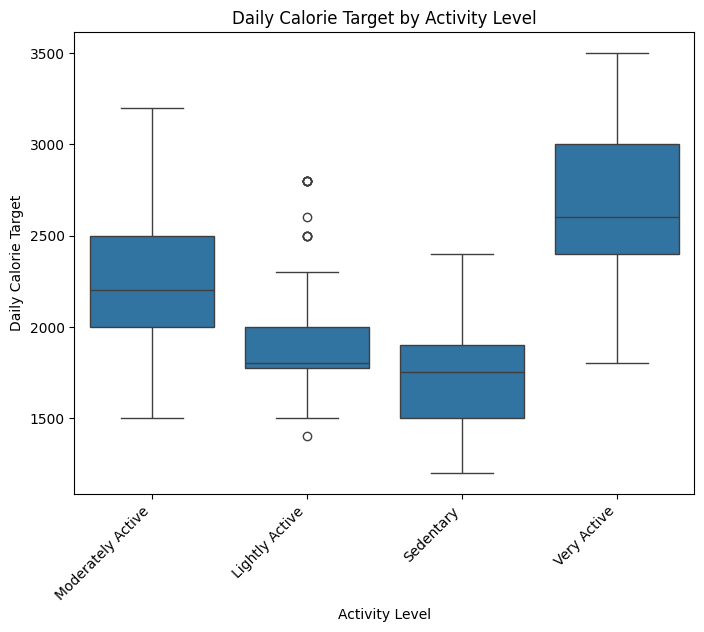

In [15]:
# Visualize the relationship between activity level and calorie target
plt.figure(figsize=(8, 6))
sns.boxplot(x='Activity Level', y='Daily Calorie Target', data=nutrition_data)
plt.title('Daily Calorie Target by Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('Daily Calorie Target')
plt.xticks(rotation=45, ha='right')
plt.show()

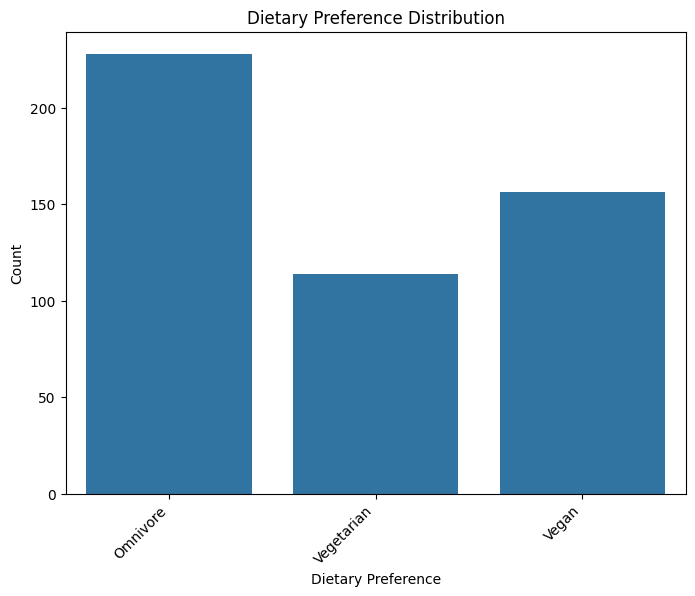

In [16]:
# Visualize the distribution of dietary preferences
plt.figure(figsize=(8, 6))
sns.countplot(x='Dietary Preference', data=nutrition_data)
plt.title('Dietary Preference Distribution')
plt.xlabel('Dietary Preference')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


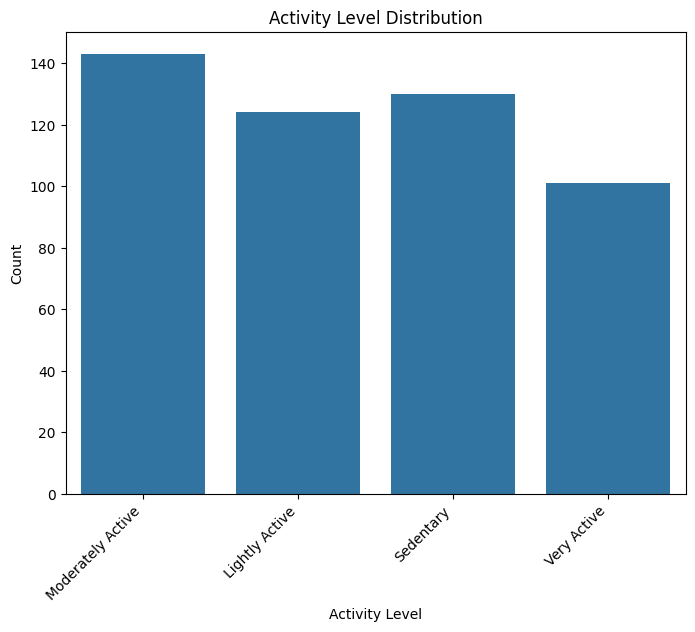

In [17]:
# Visualize the activity level distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Activity Level', data=nutrition_data)
plt.title('Activity Level Distribution')
plt.xlabel('Activity Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

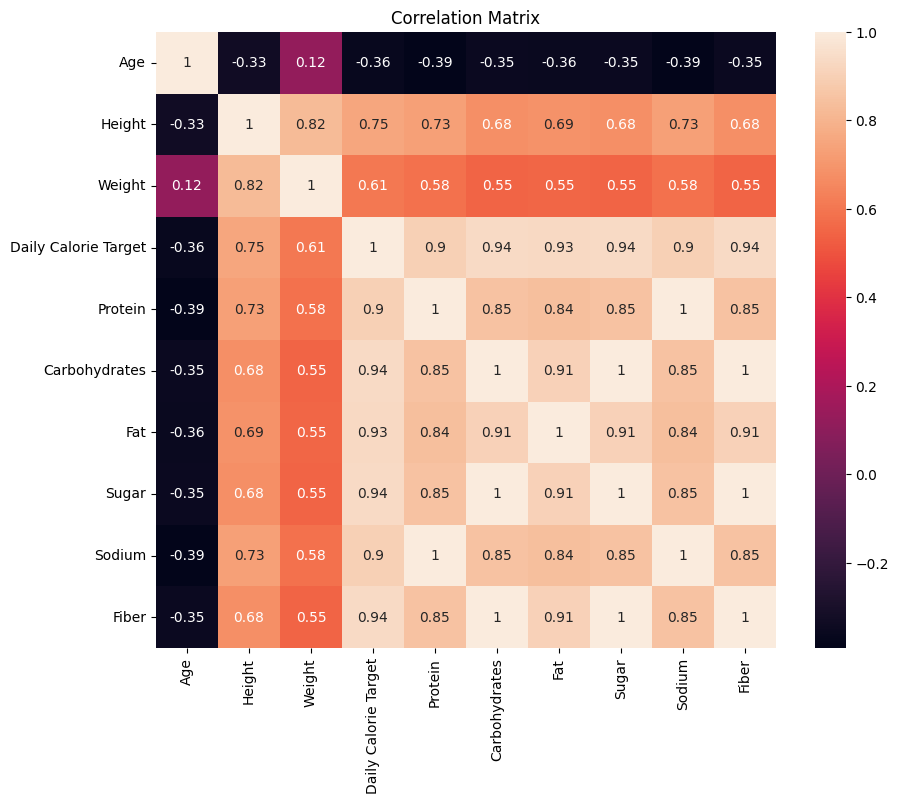

In [18]:
# Visualize the correlation matrix
correlation_matrix = nutrition_data[['Age', 'Height', 'Weight', 'Daily Calorie Target', 'Protein', 'Carbohydrates', 'Fat', 'Sugar', 'Sodium', 'Fiber']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Drop the 'Fitness Goal' column
df.drop('Fitness Goal', axis=1, inplace=True)

# Save the modified DataFrame back to the CSV file, overwriting the original file
df.to_csv('nutrition_dataset.csv', index=False)


In [20]:
# Example - Calculating BMI
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)

In [21]:
#  Encoding Categorical Variables
label_encoders = {}
for column in ['Gender', 'Activity Level', 'Dietary Preference', 'Disease']:
    le = LabelEncoder()
    nutrition_data[column] = le.fit_transform(nutrition_data[column])
    label_encoders[column] = le  # Save encoder for inverse transform if needed

In [22]:
#  Normalization
scaler = StandardScaler()

# Remove 'Fitness Goal' from numeric_features
numeric_features = ['Age', 'Height', 'Weight', 'BMI', 'Daily Calorie Target', 'Protein', 'Carbohydrates', 'Fat', 'Sugar', 'Sodium', 'Calories', 'Fiber']

# Assuming 'Fitness Goal' is the problematic column, exclude it
numeric_data = df[numeric_features]

# Convert all columns in numeric_data to numeric, coercing errors to NaN
for col in numeric_data.columns:
    numeric_data[col] = pd.to_numeric(numeric_data[col], errors='coerce')

# Fit and transform the scaler on the numeric data
df[numeric_features] = scaler.fit_transform(numeric_data)

<ipython-input-22-581988a88ea1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data[col] = pd.to_numeric(numeric_data[col], errors='coerce')


In [25]:
#  Encoding Categorical Variables
label_encoders = {}
for column in ['Gender', 'Activity Level', 'Dietary Preference', 'Disease']:
    le = LabelEncoder()
    nutrition_data[column] = le.fit_transform(nutrition_data[column])
    label_encoders[column] = le  # Save encoder for inverse transform if needed

# Normalization
scaler = StandardScaler()

# Remove 'Fitness Goal' from numeric_features
numeric_features = ['Age', 'Height', 'Weight', 'BMI', 'Daily Calorie Target', 'Protein', 'Carbohydrates', 'Fat', 'Sugar', 'Sodium', 'Calories', 'Fiber']

# Assuming 'Fitness Goal' is the problematic column, exclude it
numeric_data = df[numeric_features]

# Convert all columns in numeric_data to numeric, coercing errors to NaN
for col in numeric_data.columns:
    numeric_data[col] = pd.to_numeric(numeric_data[col], errors='coerce')

# Fit and transform the scaler on the numeric data
df[numeric_features] = scaler.fit_transform(numeric_data)


# Split Dataset
# Drop the Breakfast Suggestion, Lunch Suggestion, Dinner Suggestion, Snack Suggestion, Fitness Goal
X = nutrition_data.drop(['Breakfast Suggestion', 'Lunch Suggestion', 'Dinner Suggestion', 'Snack Suggestion', 'Fitness Goal'], axis=1)
y = nutrition_data['Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
# Define the Random Forest Model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Interpret Results
# Display feature importance for understanding which factors are most predictive
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("Feature Importances:\n", feature_importances)

<ipython-input-25-603055612fbc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data[col] = pd.to_numeric(numeric_data[col], errors='coerce')


Model Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           5       1.00      1.00      1.00        77
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00         4

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Feature Importances:
 Disease                 0.239266
Protein                 0.154194
Fat                     0.151710
Calories                0.131929
Sodium                  0.123479
Daily Calorie Target    0.061485
Fiber                   0.043254
Carbohydrates           0.035270
Sugar                   0.025077
Height                  0.011279
Weight                  0.009797
Age                     0.008020
Activity Level          0.002416
Gender                  0.001709
Dietary

In [26]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred) * 100)

100.0


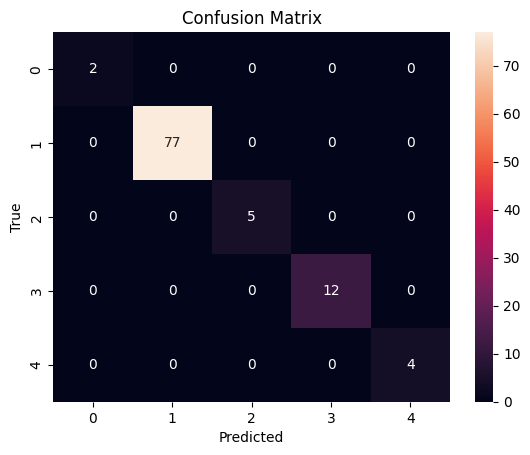

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Prepare features and labels
X = nutrition_data.drop(['Breakfast Suggestion', 'Lunch Suggestion', 'Dinner Suggestion', 'Snack Suggestion', 'Disease'], axis=1)
y = nutrition_data['Disease']

# Define categorical and numerical features
categorical_features = ['Gender', 'Activity Level', 'Dietary Preference']  # Update with your categorical columns
numerical_features = X.columns.difference(categorical_features)

# Create preprocessing pipelines
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(sparse_output=False)

# Create a column transformer that applies the right transformation to each column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit and transform the features
X_transformed = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# One-hot encoding for multi-class targets
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.values.reshape(-1, 1))

# Check the shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (398, 21)
y_train shape: (398,)


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np # Import numpy
from sklearn.preprocessing import LabelBinarizer


# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
model.add(Dense(64, activation='relu'))  # Hidden layer
# Get the number of unique classes using numpy's unique function
num_classes = len(np.unique(y_train))
model.add(Dense(num_classes, activation='softmax'))  # Output layer
# One-hot encode y_train and y_test using LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5912 - loss: 1.7139 - val_accuracy: 0.8500 - val_loss: 0.6378
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8242 - loss: 0.6322 - val_accuracy: 0.8625 - val_loss: 0.4947
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8598 - loss: 0.4815 - val_accuracy: 0.8625 - val_loss: 0.4399
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8809 - loss: 0.4055 - val_accuracy: 0.8625 - val_loss: 0.4139
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8528 - loss: 0.4356 - val_accuracy: 0.8625 - val_loss: 0.4036
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8788 - loss: 0.3773 - val_accuracy: 0.8750 - val_loss: 0.4038
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8935 - loss: 0.3379 - val_accuracy: 0.8625 - val_loss: 0.3754
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8553 - loss: 0.3810 - val_accuracy: 0.8625 - val_loss:

In [31]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Optionally, make predictions and get a classification report
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_test_classes = tf.argmax(y_test, axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_test_classes, y_pred_classes))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9458 - loss: 0.1433  
Test Accuracy: 0.9399999976158142
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           5       0.97      0.99      0.98        77
           6       1.00      1.00      1.00         5
           7       0.85      0.92      0.88        12
           8       0.33      0.25      0.29         4

    accuracy                           0.94       100
   macro avg       0.83      0.73      0.76       100
weighted avg       0.94      0.94      0.94       100



In [32]:
# Define the desired column order
desired_column_order = [
    'Age', 'Gender', 'Height', 'Weight', 'Activity Level',
    'Dietary Preference', 'Daily Calorie Target', 'Protein', 'Sugar', 'Sodium', 'Calories', 'Carbohydrates', 'Fiber',
    'Fat', 'Breakfast Suggestion', 'Lunch Suggestion', 'Dinner Suggestion',
    'Snack Suggestion',  'Disease'
]

# Reorder the columns in the DataFrame
df = df.reindex(columns=desired_column_order)

# Save the reordered dataset
df.to_csv('/content/nutrition_dataset.csv', index=False)

# Display the first few rows to confirm
df.head()

,Age,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease
0,-1.071013,Male,0.760904,0.252959,Moderately Active,Omnivore,-0.258514,0.270068,0.072219,0.270068,0.087876,0.072219,0.072219,-0.083238,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain
1,-0.608539,Female,-0.789124,-0.769002,Lightly Active,Vegetarian,-1.089094,-0.813469,-0.691373,-0.813469,-0.928534,-0.691373,-0.691373,-1.320633,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease"
2,0.448544,Male,0.244228,1.274921,Sedentary,Vegan,0.156776,-0.271700,0.835811,-0.271700,0.398445,0.835811,0.835811,0.226110,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain
3,0.911018,Female,-1.305800,-0.428348,Very Active,Omnivore,0.779711,0.811837,1.599404,0.811837,1.330154,1.599404,1.599404,1.154157,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,Weight Gain
4,1.373492,Male,-0.272448,0.593613,Sedentary,Vegetarian,-0.258514,-0.813469,0.072219,-0.813469,-0.297983,0.072219,0.072219,-0.392587,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix,Weight Gain


In [33]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import random

# Load the dataset
file_path = '/content/nutrition_dataset.csv'  # Update with your dataset path
nutrition_data = pd.read_csv(file_path)

# Define unique health conditions for individual checkboxes
unique_conditions = ["Weight Loss", "Kidney Disease", "Weight Gain", "Hypertension", "Diabetes", "Acne", "Heart Disease"]


# Function to recommend meals based on input
def recommend_meals(name, age, weight, height, dietary_pref, health_conditions):
    # Step 1: Filter by dietary preference
    filtered_data = nutrition_data[nutrition_data['Dietary Preference'].str.contains(dietary_pref, case=False, na=False)].copy()

    # Debug: Check shape of filtered data
    print("Filtered data shape after dietary preference filtering:", filtered_data.shape)

    # Check if filtered data is empty
    if filtered_data.empty:
        display(widgets.HTML(f"<h3>Hello {name}!</h3>"))
        display(widgets.HTML("<p>Unfortunately, we couldn't find a meal plan that matches your dietary preference. Please try different options.</p>"))
        return

    # Step 3: Filter further by health conditions (if any are selected)
    if health_conditions:
        health_condition_pattern = '|'.join(health_conditions)
        condition_filtered_data = filtered_data[filtered_data['Disease'].str.contains(health_condition_pattern, case=False, na=False)]

        # Debug: Check shape of condition filtered data
        print("Filtered data shape after health condition filtering:", condition_filtered_data.shape)

        # If there are no exact matches for health conditions, fallback to dietary preference only
        if not condition_filtered_data.empty:
            filtered_data = condition_filtered_data

    # After filtering, check if filtered_data is empty again
    if filtered_data.empty:
        display(widgets.HTML(f"<h3>Hello {name}!</h3>"))
        display(widgets.HTML("<p>No meals found matching your health conditions.</p>"))
        return

    # Step 4: Choose the closest age and weight from the remaining data
    filtered_data['Age Difference'] = abs(filtered_data['Age'] - age)
    filtered_data['Weight Difference'] = abs(filtered_data['Weight'] - weight)

    # Check if filtered_data is still valid before accessing
    if filtered_data.shape[0] > 0:
        recommended = filtered_data.sort_values(by=['Age Difference', 'Weight Difference']).iloc[0]

        # Calculate BMI
        height_m = height / 100  # Convert cm to meters
        bmi_value = weight / (height_m ** 2)

        # Display personalized greeting, BMI, and meal suggestions
        display(widgets.HTML(f"<h3>Hello {name}!</h3>"))
        display(widgets.HTML(f"<p>Your BMI is: <strong>{bmi_value:.2f}</strong></p>"))

        # BMI-based recommendation
        if bmi_value < 18.5:
            recommendation = "Your BMI is below the normal range. Consider a diet to help with weight gain."
        elif 18.5 <= bmi_value < 24.9:
            recommendation = "Your BMI is within the normal range. Maintain a balanced diet to stay healthy!"
        else:
            recommendation = "Your BMI is above the normal range. Consider a diet plan for weight management."
        display(widgets.HTML(f"<p>{recommendation}</p>"))

        specific_diet = "Here's a suggested weekly meal plan based on your preferences and health conditions."
        display(widgets.HTML(f"<p>{specific_diet}</p>"))

        # Weekly meal plan - generating random meals for each day
        # Weekly meal plan - generating random meals for each day
        weekly_plan = pd.DataFrame({
          "Day": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
          "Breakfast": [random.choice(filtered_data["Breakfast Suggestion"].dropna().tolist()) for _ in range(7)],
          "Lunch": [random.choice(filtered_data["Lunch Suggestion"].dropna().tolist()) for _ in range(7)],
          "Dinner": [random.choice(filtered_data["Dinner Suggestion"].dropna().tolist()) for _ in range(7)],
          "Snack": [random.choice(filtered_data["Snack Suggestion"].dropna().tolist()) for _ in range(7)]
       })
        display(weekly_plan)
    else:
        display(widgets.HTML("<p>No suitable meal found based on your input.</p>"))

# Creating widgets for input form
name_widget = widgets.Text(description="Name")
age_widget = widgets.IntText(description="Age")
weight_widget = widgets.FloatText(description="Weight (kg)")
height_widget = widgets.FloatText(description="Height (cm)")
dietary_pref_widget = widgets.Dropdown(
    options=nutrition_data['Dietary Preference'].unique(),
    description="Dietary Preference"
)

# Create individual checkboxes for each unique health condition
health_condition_checkboxes = [widgets.Checkbox(value=False, description=condition) for condition in unique_conditions]

# Submit button
button = widgets.Button(description="Generate Meal Plan")

# Display form widgets
display(name_widget, age_widget, weight_widget, height_widget, dietary_pref_widget)
for checkbox in health_condition_checkboxes:
    display(checkbox)
display(button)

# Function to handle button click
def on_button_clicked(b):
    name = name_widget.value
    age = age_widget.value
    weight = weight_widget.value
    height = height_widget.value
    dietary_pref = dietary_pref_widget.value

    # Get selected health conditions
    selected_conditions = [checkbox.description for checkbox in health_condition_checkboxes if checkbox.value]

    recommend_meals(name, age, weight, height, dietary_pref, selected_conditions)

button.on_click(on_button_clicked)


Text(value='', description='Name')

IntText(value=0, description='Age')

FloatText(value=0.0, description='Weight (kg)')

FloatText(value=0.0, description='Height (cm)')

Dropdown(description='Dietary Preference', options=('Omnivore', 'Vegetarian', 'Vegan'), value='Omnivore')

Checkbox(value=False, description='Weight Loss')

Checkbox(value=False, description='Kidney Disease')

Checkbox(value=False, description='Weight Gain')

Checkbox(value=False, description='Hypertension')

Checkbox(value=False, description='Diabetes')

Checkbox(value=False, description='Acne')

Checkbox(value=False, description='Heart Disease')

Button(description='Generate Meal Plan', style=ButtonStyle())

Filtered data shape after dietary preference filtering: (228, 19)
Filtered data shape after health condition filtering: (9, 19)


HTML(value='<h3>Hello Shreya!</h3>')

HTML(value='<p>Your BMI is: <strong>22.22</strong></p>')

HTML(value='<p>Your BMI is within the normal range. Maintain a balanced diet to stay healthy!</p>')

HTML(value="<p>Here's a suggested weekly meal plan based on your preferences and health conditions.</p>")

,Day,Breakfast,Lunch,Dinner,Snack
0,Monday,Oatmeal with berries and nuts,Chicken breast salad with mixed greens,Chicken breast with steamed vegetables,Apple with almond butter
1,Tuesday,Greek yogurt with berries and granola,Grilled chicken salad with mixed greens,Grilled chicken with roasted vegetables,Apple with peanut butter
2,Wednesday,Scrambled eggs with whole-wheat toast,Grilled chicken salad with mixed greens,Chicken breast with roasted vegetables,Yogurt parfait with granola
3,Thursday,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables and brown rice,Greek yogurt with fruit and granola
4,Friday,Oatmeal with berries and nuts,Tuna salad sandwich on whole-wheat bread,Chicken breast with roasted vegetables,Greek yogurt with fruit
5,Saturday,Oatmeal with berries and nuts,Chicken breast salad with mixed greens and avo...,Chicken breast with steamed vegetables,Greek yogurt with fruit
6,Sunday,Scrambled eggs with whole-wheat toast,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Apple with almond butter
